In [17]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [18]:
ctrl_max = pd.read_csv('data/ctrl_max.csv')
ctrl_min = pd.read_csv('data/ctrl_min.csv')
rcp_max = pd.read_csv('data/rcp_max.csv')
rcp_min = pd.read_csv('data/rcp_min.csv')

# set threshold at a value that occurs once every 10 years in control climate
tmax_threshold = ctrl_max.TREFHTMX.quantile(1-1/10/365.25)
tmax_threshold

311.114507759069

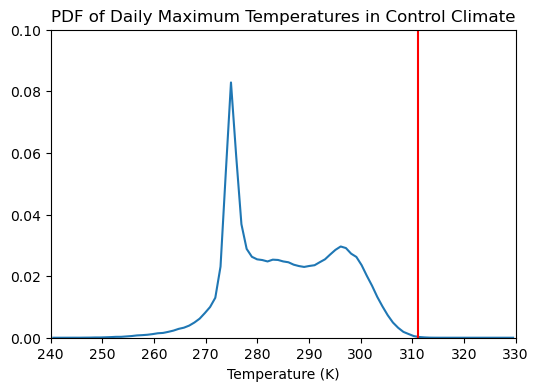

<Figure size 640x480 with 0 Axes>

In [32]:
# plot temperature distribution in control climate
bins = np.linspace(240, 330, 90)
histogram, bins = np.histogram(ctrl_max.TREFHTMX, bins=bins, density=True)
bin_centers = 0.5*(bins[1:] + bins[:-1])
pdf = stats.norm.pdf(bin_centers)
plt.figure(figsize=(6, 4))
plt.plot(bin_centers, histogram, label="Histogram of samples")
plt.axvline(x = tmax_threshold, color = 'r')
plt.title("PDF of Daily Maximum Temperatures in Control Climate")
plt.xlabel("Temperature (K)")
plt.xlim([240, 330])
plt.ylim([0, .1])
plt.show()
plt.clf()

In [20]:
# mean in historical climate
tmax_control_average = ctrl_max.TREFHTMX.mean()
tmax_control_average

285.22189775208113

In [21]:
# fraction of time above threshold in control climate
frac = len(ctrl_max.TREFHTMX[ctrl_max.TREFHTMX>tmax_threshold])/len(ctrl_max.TREFHTMX)
print("fraction of days above threshold: " + str(frac))
years = 1/365.25/frac
print("occurs once every " + str(years) + " years")

fraction of days above threshold: 0.0002741253118175422
occurs once every 9.987588409765001 years


<AxesSubplot: >

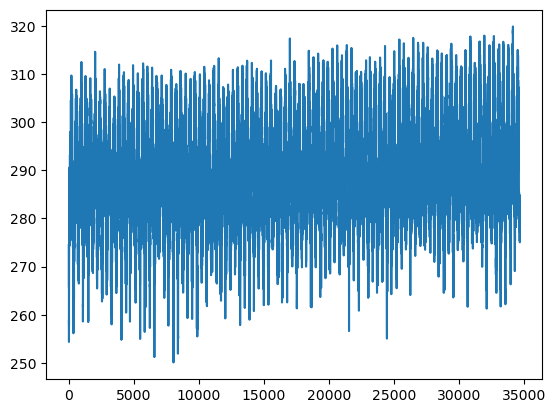

In [22]:
# look at timeseries of one model run in future
maxtemps_1 = rcp_max.TREFHTMX[rcp_max['member_id'] == 1]
maxtemps_1.plot()

In [23]:
# we'll look at last 20 years
rcp_max = rcp_max[rcp_max.time > '2081-01-01 12:00:00']

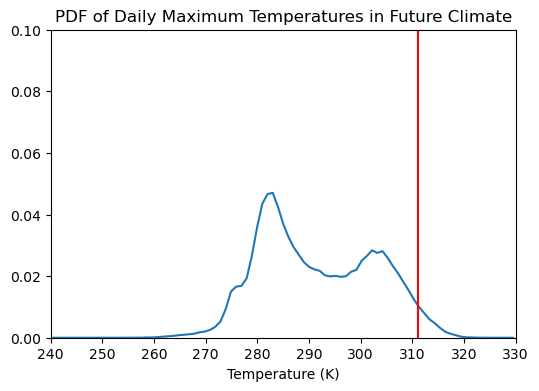

<Figure size 640x480 with 0 Axes>

In [34]:
# plot the temperature distribution
# plot temperature distribution in control climate
bins = np.linspace(240, 330, 90)
histogram, bins = np.histogram(rcp_max.TREFHTMX, bins=bins, density=True)
bin_centers = 0.5*(bins[1:] + bins[:-1])
pdf = stats.norm.pdf(bin_centers)
plt.figure(figsize=(6, 4))
plt.plot(bin_centers, histogram, label="Histogram of samples")
plt.title("PDF of Daily Maximum Temperatures in Future Climate")
plt.xlabel("Temperature (K)")
plt.axvline(x = tmax_threshold, color = 'r')
plt.xlim([240, 330])
plt.ylim([0, .1])
plt.show()
plt.clf()

In [25]:
# frequency of extreme temperature in this modelled climate
frac = len(rcp_max.TREFHTMX[rcp_max.TREFHTMX>tmax_threshold])/len(rcp_max.TREFHTMX)
print("fraction of days above threshold: " + str(frac))
years = 1/365.25/frac
print("occurs once every " + str(years) + " years")

fraction of days above threshold: 0.03355596657076312
occurs once every 0.08159058036246691 years


In [30]:
# what about if the max temp distribution hadn't changed, just shifted?
tmax_rcp_average = rcp_max.TREFHTMX.mean()
shift = tmax_rcp_average - tmax_control_average
print(tmax_rcp_average)
print(tmax_control_average)
shift

291.5097300629196
285.22189775208113


6.287832310838439

In [27]:
# just shift temps from control
tmax_control_shifted = ctrl_max.TREFHTMX + shift

# see frequency above threshold
frac = len(tmax_control_shifted[tmax_control_shifted>tmax_threshold])/len(tmax_control_shifted)
print("fraction of days above threshold: " + str(frac))
years = 1/365.25/frac
print("occurs once every " + str(years) + " years")

fraction of days above threshold: 0.018721235878739147
occurs once every 0.1462430581434719 years


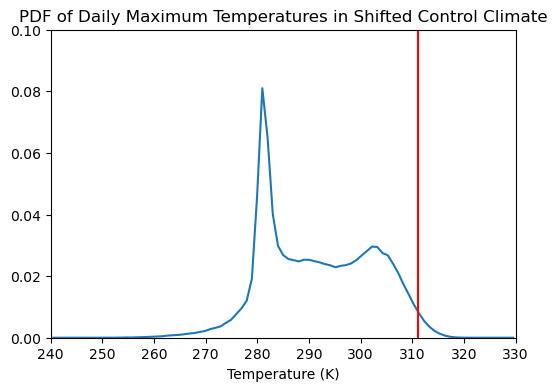

<Figure size 640x480 with 0 Axes>

In [33]:
# plot temperature distribution in shifted control climate
bins = np.linspace(240, 330, 90)
histogram, bins = np.histogram(tmax_control_shifted, bins=bins, density=True)
bin_centers = 0.5*(bins[1:] + bins[:-1])
pdf = stats.norm.pdf(bin_centers)
plt.figure(figsize=(6, 4))
plt.plot(bin_centers, histogram, label="Histogram of samples")
plt.axvline(x = tmax_threshold, color = 'r')
plt.title("PDF of Daily Maximum Temperatures in Shifted Control Climate")
plt.xlabel("Temperature (K)")
plt.xlim([240, 330])
plt.ylim([0, .1])
plt.show()
plt.clf()

This is less often than the future modelled climate, suggesting climate change will increase the frequency of these events beyond just a shift in the temp distribution

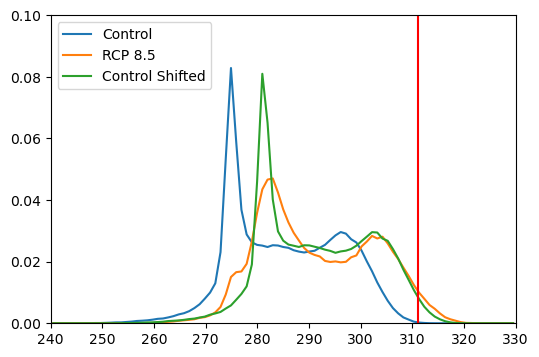

In [28]:
# we can plot all the distributions for visual comparison
bins = np.linspace(240, 330, 90)
plt.figure(figsize=(6, 4))

histogram1, bins = np.histogram(ctrl_max.TREFHTMX, bins=bins, density=True)
bin1_centers = 0.5*(bins[1:] + bins[:-1])
pdf1 = stats.norm.pdf(bin1_centers)
plt.plot(bin1_centers, histogram1, label="Control")

histogram2, bins = np.histogram(rcp_max.TREFHTMX, bins=bins, density=True)
bin2_centers = 0.5*(bins[1:] + bins[:-1])
pdf2 = stats.norm.pdf(bin2_centers)
plt.plot(bin1_centers, histogram2, label="RCP 8.5")

histogram3, bins = np.histogram(tmax_control_shifted, bins=bins, density=True)
bin3_centers = 0.5*(bins[1:] + bins[:-1])
pdf3 = stats.norm.pdf(bin3_centers)
plt.plot(bin3_centers, histogram3, label="Control Shifted")

plt.legend()
plt.axvline(x = tmax_threshold, color = 'r')
plt.xlim([240, 330])
plt.ylim([0, .1])
plt.show()

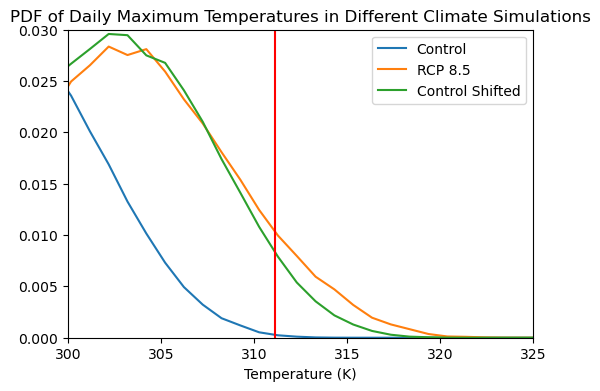

In [35]:
# we can plot all the distributions for visual comparison
bins = np.linspace(240, 330, 90)
plt.figure(figsize=(6, 4))

histogram1, bins = np.histogram(ctrl_max.TREFHTMX, bins=bins, density=True)
bin1_centers = 0.5*(bins[1:] + bins[:-1])
pdf1 = stats.norm.pdf(bin1_centers)
plt.plot(bin1_centers, histogram1, label="Control")

histogram2, bins = np.histogram(rcp_max.TREFHTMX, bins=bins, density=True)
bin2_centers = 0.5*(bins[1:] + bins[:-1])
pdf2 = stats.norm.pdf(bin2_centers)
plt.plot(bin1_centers, histogram2, label="RCP 8.5")

histogram3, bins = np.histogram(tmax_control_shifted, bins=bins, density=True)
bin3_centers = 0.5*(bins[1:] + bins[:-1])
pdf3 = stats.norm.pdf(bin3_centers)
plt.plot(bin3_centers, histogram3, label="Control Shifted")
plt.title("PDF of Daily Maximum Temperatures in Different Climate Simulations")
plt.xlabel("Temperature (K)")

plt.legend()
plt.axvline(x = tmax_threshold, color = 'r')


#Zoom in on the area of interest 
plt.xlim([300, 325])
plt.ylim([0, .03])
plt.show()

In [14]:
#Even with a different threshold, we'd get the same result
#could try comparing CDFs for better visualization?